In [1]:
import torch
from snn_delays.snn import SNN
from snn_delays.experimental_models.snn_binary_copy import BinarySNN
from snn_delays.utils.dataset_loader import DatasetLoader
from snn_delays.utils.model_loader import ModelLoader
from snn_delays.utils.train_utils import train, get_device, propagate_batch
from snn_delays.utils.visualization_utils import plot_raster
from snn_delays.utils.test_behavior import tb_save_max_last_acc
import matplotlib.pyplot as plt

device = get_device()

# For reproducibility
torch.manual_seed(10)

c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on: cuda:0


In [2]:
### DATASET

# Parameters
dataset = 'stmnist'
total_time = 50
batch_size = 1024

# Resized dataloader
# DATASET
DL = DatasetLoader(dataset=dataset,
                   caching='memory',
                   num_workers=0,
                   batch_size=batch_size,
                   total_time=total_time)

train_loader, test_loader, dataset_dict = DL.get_dataloaders()

[ToFrame(sensor_size=(10, 10, 2), time_window=None, event_count=None, n_time_bins=50, n_event_bins=None, overlap=0, include_incomplete=False)]


(50, 2, 10, 10)
(10, 10)


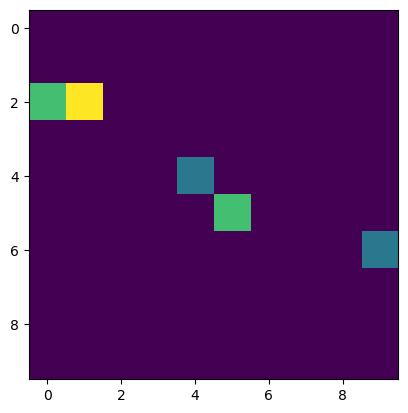

In [3]:
sample, label = DL._dataset.train_dataset.__getitem__(3)
print(sample.shape)
print(sample[0][0].shape)
plt.imshow(sample[0][0])

In [4]:
### SPIKING NEURAL NETWORK
#structure = (64, 1) # model 1 68%
#structure = (32, 2) # model 2 49%
structure = (64, 1) # model 3 49%

dataset_dict["time_ms"] = 2e3

loss_fn='spk_count'
#loss_fn = 'mem_sum'

snn = SNN(dataset_dict=dataset_dict, structure=structure, connection_type='f',
          delay=None, delay_type='', tau_m='normal',
          reset_to_zero=True, win=total_time,
          loss_fn=loss_fn, batch_size=batch_size, device=device,
          debug=True)
snn.input2spike_th = None

snn.to(device)

snn.model_name = 'full_weights_' + snn.model_name

num_epochs = 100
lr = 1e-3
ckpt_dir = 'exp_snn2chip'

train(snn, train_loader, test_loader, lr, num_epochs, dropout=0.0, 
    test_behavior=tb_save_max_last_acc, ckpt_dir=ckpt_dir, scheduler=(10, 0.95), test_every=1, freeze_taus=True)


[INFO] Delays: tensor([0])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([0])

[INFO] Delays o: tensor([0])
training full_weights_stmnist50_SNN_l1_1d1.t7 for 100 epochs...
Epoch [1/100], learning_rates 0.001000, 0.100000


KeyboardInterrupt: 

In [3]:
#snn_full = ModelLoader('full_weights_stmnist50_SNN_l1_1d1.t7_6841726618705036_max_100epoch','exp_snn2chip', batch_size, device, True)
snn_full = ModelLoader('full_weights_stmnist50_SNN_l1_1d1.t7_7712230215827338_max_89epoch','exp_snn2chip', batch_size, device, True)
#snn_full = ModelLoader('full_weights_stmnist50_SNN_l1_1d1.t7_874820143884892_max_92epoch','exp_snn2chip', batch_size, device, True)


[INFO] Delays: tensor([0])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([0])

[INFO] Delays o: tensor([0])
Instance of <class 'snn_delays.snn.SNN'> loaded successfully


c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\torch\serialization.py:1113: SourceChangeWarning: source code of class 'snn_delays.snn.SNN' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [6]:
snn_full.model_name = 'full_weights_500_epochs'

num_epochs = 5
lr = 1e-3
ckpt_dir = 'exp_snn2chip'

train(snn_full, train_loader, test_loader, lr, 50, dropout=0.0, 
    test_behavior=tb_save_max_last_acc, ckpt_dir=ckpt_dir, scheduler=(100, 0.95), test_every=1, freeze_taus=True)

training full_weights_500_epochs for 50 epochs...
Epoch [1/50], learning_rates 0.001000, 0.100000
Step [1/5], Loss: 0.06336


c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


l1_score: 0
Step [2/5], Loss: 0.06567
l1_score: 0
Step [3/5], Loss: 0.06550
l1_score: 0
Step [4/5], Loss: 0.06377
l1_score: 0
Step [5/5], Loss: 0.06526
l1_score: 0
Step [6/5], Loss: 0.06521
l1_score: 0
Time elasped: 261.9635307788849
Test Loss: 0.12817256152629852
Avg spk_count per neuron for all 50 time-steps 4.600753307342529
Avg spk per neuron per layer [4.600753147482014]
Test Accuracy of the model on the test samples: 67.986

Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\exp_snn2chip
Gradient norm for 'f0_f1.weight': 0.0004
Gradient norm for 'f1_o.weight': 0.0015
Epoch [2/50], learning_rates 0.000950, 0.095000
Step [1/5], Loss: 0.06304
l1_score: 0
Step [2/5], Loss: 0.06528
l1_score: 0
Step [3/5], Loss: 0.06477
l1_score: 0
Step [4/5], Loss: 0.06441
l1_score: 0
Step [5/5], Loss: 0.06426
l1_score: 0
Step [6/5], Loss: 0.06649
l1_score: 0
Time elasped: 1.3824191093444824
Test Loss: 0.12859763205051422
Avg spk_count per neuron for all 50 time-

Transferring the pretrained weights to the BinarizedSNN

In [3]:
#snn_full = ModelLoader('full_weights_stmnist50_SNN_l1_1d1.t7_6841726618705036_max_100epoch','exp_snn2chip', batch_size, device, True)
#snn_full = ModelLoader('full_weights_stmnist50_SNN_l1_1d1.t7_7712230215827338_max_89epoch','exp_snn2chip', batch_size, device, True)
snn_full = ModelLoader('full_weights_stmnist50_SNN_l1_1d1.t7_874820143884892_max_92epoch','exp_snn2chip', batch_size, device, True)

#snn_full.input2spike_th = None

# from snn_delays.utils.train_utils import copy_snn
# snn_full_copy = copy_snn(snn_full, batch_size)

### SPIKING NEURAL NETWORK
structure = snn_full.structure
dataset_dict["time_ms"] = 2e3
loss_fn = snn_full.loss_fn

snn = BinarySNN(dataset_dict=dataset_dict, structure=structure, connection_type='f',
          delay=None, delay_type='', tau_m='normal', binary=True,
          reset_to_zero=True, win=total_time,
          loss_fn=loss_fn, batch_size=batch_size, device=device,
          debug=True)
snn.set_network()
#snn.input2spike_th = None


c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\torch\serialization.py:1113: SourceChangeWarning: source code of class 'snn_delays.snn.SNN' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)



[INFO] Delays: tensor([0])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([0])

[INFO] Delays o: tensor([0])
2000.0
Delta t: 40.0 ms
mean of normal: -1.8545865421311407
Instance of <class 'snn_delays.snn.SNN'> loaded successfully

[INFO] Delays: tensor([0])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([0])

[INFO] Delays o: tensor([0])
2000.0
Delta t: 40.0 ms
mean of normal: -1.8545865421311407


In [4]:
weight_taus = [(name, w) for name, w  in snn.named_parameters() if 's' not in name]

for (name_src, param_src), (name_dst, param_dst) in zip(snn_full.named_parameters(), weight_taus):
    assert name_src == name_dst, f"Parameter mismatch: {name_src} != {name_dst}"
    param_dst.data.copy_(param_src.data)

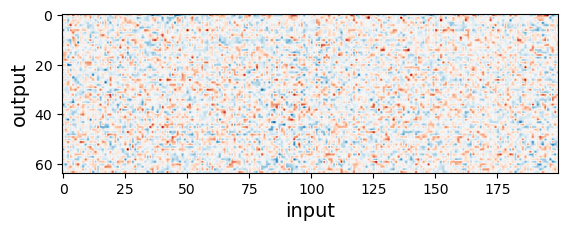

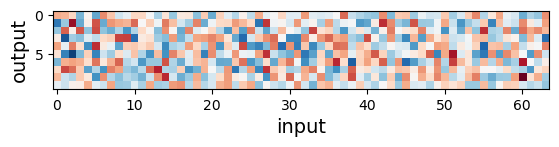

In [5]:
from snn_delays.utils.visualization_utils import plot_param, plot_distributions

w_params = [w for name, w  in snn.named_parameters() if 'f' in name]

for w in w_params:
    plot_param(w, '2D')
    plt.show()


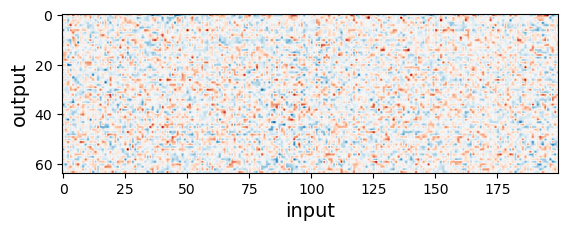

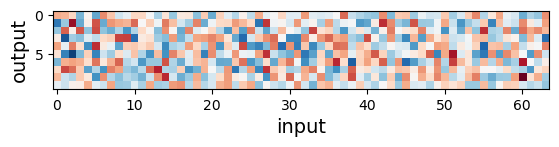

In [6]:
from snn_delays.utils.visualization_utils import plot_param, plot_distributions

w_params = [w for name, w  in snn_full.named_parameters() if 'f' in name]

for w in w_params:
    plot_param(w, '2D')
    plt.show()

In [8]:
snn_full.to(device)
snn_full.input2spike_th = None
snn.to(device)

# initial scores
a, b =snn_full.test(test_loader)
a, b =snn.test(test_loader)

Test Loss: 0.5237329453229904
Avg spk_count per neuron for all 50 time-steps 12.529282569885254
Avg spk per neuron per layer [12.529282823741006]
Test Accuracy of the model on the test samples: 86.763

Test Loss: 4.8526611328125
Avg spk_count per neuron for all 50 time-steps 13.726180076599121
Avg spk per neuron per layer [13.726180305755395]
Test Accuracy of the model on the test samples: 10.432



In [9]:
num_epochs = 100
lr = 1e-3
ckpt_dir = 'exp_snn2chip'

#snn.model_name = 'fine_tuned_unary_from_pretrained_spkcount' + snn.model_name
#snn.model_name = 'fine_tuned_unary_from_pretrained_memsum' + snn.model_name

#snn.model_name = 'fine_tuned_unaryhf_from_pretrained_spkcount' + snn.model_name
snn.model_name = 'xxx' + snn.model_name

#snn.model_name = 'fine_tuned_binary_from_pretrained_spkcount' + snn.model_name
#snn.model_name = 'fine_tuned_binary_from_pretrained_memsum' + snn.model_name

train(snn, train_loader, test_loader, lr, num_epochs, dropout=0.0, 
    test_behavior=tb_save_max_last_acc, ckpt_dir=ckpt_dir, scheduler=(100, 0.95), test_every=1, freeze_taus=True)

training xxxstmnist50_snn_binary_co_l1_1d1.t7 for 100 epochs...
Epoch [1/100], learning_rates 0.001000, 0.100000
Step [1/5], Loss: 4.92400


c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


l1_score: 0
Step [2/5], Loss: 4.75884
l1_score: 0
Step [3/5], Loss: 4.69834
l1_score: 0
Step [4/5], Loss: 4.42272
l1_score: 0
Step [5/5], Loss: 4.39775
l1_score: 0
Step [6/5], Loss: 4.37945
l1_score: 0
Time elasped: 271.842413187027
Test Loss: 4.187152147293091
Avg spk_count per neuron for all 50 time-steps 13.668726921081543
Avg spk per neuron per layer [13.668727517985612]
Test Accuracy of the model on the test samples: 13.094

Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\exp_snn2chip
Gradient norm for 'f0_f1.weight': 1.6811
Gradient norm for 'f1_o.weight': 51.8255
saving max acc: 13.093525179856115
Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\exp_snn2chip
Epoch [2/100], learning_rates 0.001000, 0.100000
Step [1/5], Loss: 4.34453
l1_score: 0
Step [2/5], Loss: 4.03085
l1_score: 0
Step [3/5], Loss: 4.03445
l1_score: 0
Step [4/5], Loss: 3.98489
l1_score: 0
Step [5/5], Loss: 4.00439
l1_score: 0
Step

c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\torch\serialization.py:662: UserWarning: Couldn't retrieve source code for container of type BinarySNN. It won't be checked for correctness upon loading.
  warnings.warn("Couldn't retrieve source code for container of "


Step [1/5], Loss: 1.44473
l1_score: 0
Step [2/5], Loss: 1.49325
l1_score: 0
Step [3/5], Loss: 1.43168
l1_score: 0
Step [4/5], Loss: 1.49025
l1_score: 0
Step [5/5], Loss: 1.43180
l1_score: 0
Step [6/5], Loss: 1.41317
l1_score: 0
Time elasped: 3.076436996459961
Test Loss: 1.5130469799041748
Avg spk_count per neuron for all 50 time-steps 16.84441375732422
Avg spk per neuron per layer [16.84441321942446]
Test Accuracy of the model on the test samples: 57.410

Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\exp_snn2chip
Gradient norm for 'f0_f1.weight': 0.1400
Gradient norm for 'f1_o.weight': 1.7859
Epoch [98/100], learning_rates 0.001000, 0.100000
Step [1/5], Loss: 1.46930
l1_score: 0
Step [2/5], Loss: 1.43156
l1_score: 0
Step [3/5], Loss: 1.44396
l1_score: 0
Step [4/5], Loss: 1.50862
l1_score: 0
Step [5/5], Loss: 1.41978
l1_score: 0
Step [6/5], Loss: 1.37315
l1_score: 0
Time elasped: 3.0400562286376953
Test Loss: 1.4967530369758606
Avg spk_count p

Transfer the binarized weights back to a normal SNN 


[INFO] Delays: tensor([0])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([0])

[INFO] Delays o: tensor([0])
2000.0
Delta t: 40.0 ms
mean of normal: -1.8545865421311407


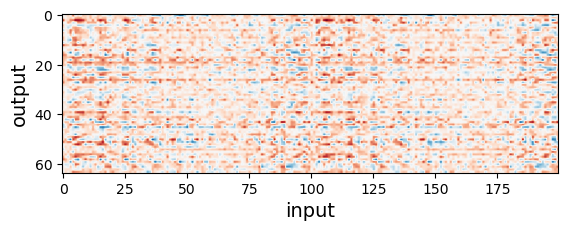

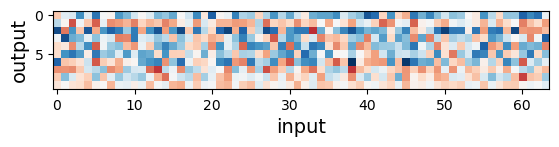

tensor(0.1373, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.2271, device='cuda:0', grad_fn=<MeanBackward0>)


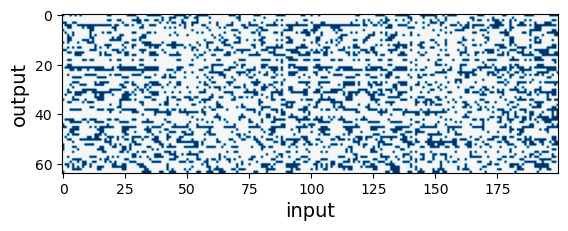

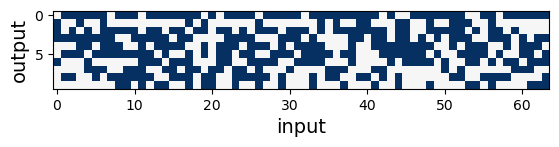

Test Loss: 1.5139092206954956
Avg spk_count per neuron for all 50 time-steps 17.024887084960938
Avg spk per neuron per layer [17.024887589928056]
Test Accuracy of the model on the test samples: 59.281

Test Loss: 1.494570553302765
Avg spk_count per neuron for all 50 time-steps 17.024887084960938
Avg spk per neuron per layer [17.024887589928056]
Test Accuracy of the model on the test samples: 59.281



In [10]:
from snn_delays.utils.visualization_utils import plot_param, plot_distributions
from snn_delays.experimental_models.snn_binary_copy import Binarize
from snn_delays.utils.train_utils import copy_snn

snn_bin = SNN(dataset_dict=dataset_dict, structure=structure, connection_type='f',
          delay=None, delay_type='', tau_m='normal',
          reset_to_zero=True, win=total_time,
          loss_fn=loss_fn, batch_size=batch_size, device=device,
          debug=True)
snn_bin.set_network()

snn_bin.to(device)

for (name_src, param_src), (name_dst, param_dst) in zip(snn.named_parameters(), snn_bin.named_parameters()):
    assert name_src == name_dst, f"Parameter mismatch: {name_src} != {name_dst}"
    param_dst.data.copy_(param_src.data)

w_params = [w for name, w  in snn_bin.named_parameters() if 'f' in name]
for w in w_params:
    plot_param(w, '2D')
    plt.show()

### binarization operation
for w in w_params:
    scale = w.abs().mean()
    print(scale)
    #w.data = (w.data > 0.0).float().mul(scale)
    #w.data = w.data.sign().mul(scale)
    w.data = (w.data > 0.0).float().mul(scale*0.3)

for w in w_params:
    plot_param(w, '2D')
    plt.show()

# initial scores
a, b = snn.test(test_loader)
a, b = snn_bin.test(test_loader)

[0, 1]


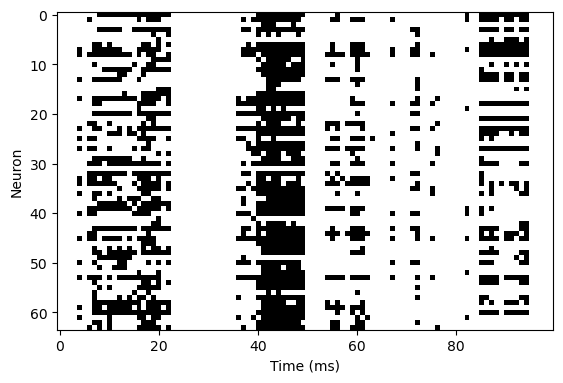

[0, 1]


<Axes: xlabel='Time (ms)', ylabel='Neuron'>

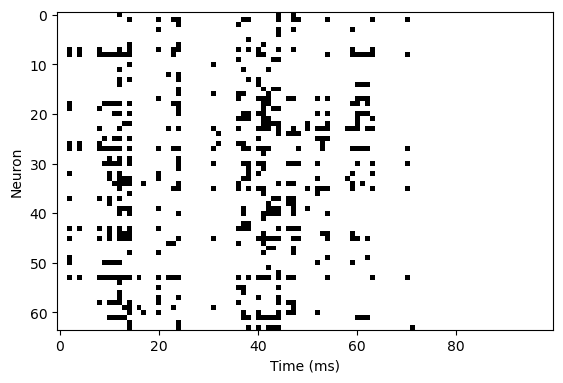

In [16]:
from snn_delays.utils.visualization_utils import plot_raster
plot_raster(snn, 'f1', 2)
plt.show()
plot_raster(snn_bin, 'f1', 2)

In [37]:
snn_bin.f0_f1.weight

Parameter containing:
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.1378, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.1378,  ..., 0.0000, 0.0000, 0.0000]],
       device='cuda:0', requires_grad=True)

### Test different Binarize functions


[INFO] Delays: tensor([0])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([0])

[INFO] Delays o: tensor([0])
2000.0
Delta t: 40.0 ms
mean of normal: -1.8545865421311407


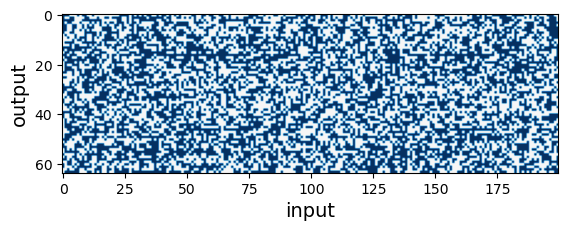

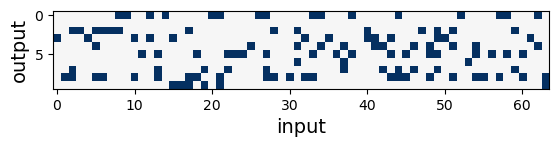

Parameter containing:
tensor([[0.2673, 0.2673, 0.2673,  ..., 0.2673, 0.0000, 0.0000],
        [0.2673, 0.0000, 0.0000,  ..., 0.2673, 0.2673, 0.0000],
        [0.2673, 0.2673, 0.2673,  ..., 0.2673, 0.2673, 0.0000],
        ...,
        [0.2673, 0.0000, 0.0000,  ..., 0.2673, 0.2673, 0.0000],
        [0.0000, 0.0000, 0.2673,  ..., 0.2673, 0.2673, 0.2673],
        [0.0000, 0.2673, 0.2673,  ..., 0.0000, 0.2673, 0.2673]],
       device='cuda:0', requires_grad=True)


In [ ]:
from torch.autograd import Function
# Custom Binarization Function (like the one you provided)
class Binarize(Function):
    @staticmethod
    def forward(ctx, input, quant_mode='det', allow_scale=True, inplace=False):
        ctx.inplace = inplace
        if ctx.inplace:
            ctx.mark_dirty(input)
            output = input
        else:
            output = input.clone()

        scale = output.abs().max() if allow_scale else 1

        if quant_mode == 'det':
            #return output.div(scale).sign().mul(scale) # {-1, 1}
            #return output.div(scale).clamp(0, 1).mul(scale) # {0, 1} (relu-like)
            return (output > 0.0).float().mul(scale) # {0, 1}
        else:
            return output.div(scale).add_(1).div_(2).add_(torch.rand(output.size()).add(-0.5)).clamp_(0,1).round().mul_(2).add_(-1).mul(scale)

    @staticmethod
    def backward(ctx, grad_output):
        # Straight-through Estimator (STE)
        grad_input = grad_output
        return grad_input, None, None, None
    
snn_bin = copy_snn(snn, batch_size)

w_params = [w for name, w  in snn_bin.named_parameters() if 'f' in name]

for w in w_params:
    w.data = Binarize.apply(w.data)

for w in w_params:
    plot_param(w, '2D')
    plt.show()

print(w_params[0])